# UNIVARIATE OUTLIERS

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/50_Startups (1).csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# We can calculate the mean and standard deviation of a given sample, then calculate the cut-off for identifying outliers as more than 3 standard deviations from the mean.

In [7]:
import numpy as np
df[np.abs(df.MKT-df.MKT.mean())>3*df.MKT.std()]

,RND,ADMIN,MKT,STATE,PROFIT


# BIVARIATE OUTLIERS

In [8]:
# Using Scatter plots for continuous variables

In [9]:
# Using Box plots for categorical variables

# MULTIVARIATE OUTLIERS

In [10]:
# Using KMeans Clustering for detecting outliers

In [50]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, init="random")
model = km.fit(df[["MKT", "RND", "ADMIN"]])

In [51]:
centroids = model.cluster_centers_
lbls = model.labels_
wcss = model.inertia_

In [52]:
centroids

array([[242758.93333333,  85480.06      , 124081.94      ],
       [ 16522.232     ,   3409.602     , 111137.842     ],
       [184871.17555556,  34813.10666667,  90535.63888889],
       [297114.46      ,   1315.46      , 115816.21      ],
       [380040.985     , 142949.54      , 102755.97      ],
       [291581.76285714, 111669.85857143, 140134.77857143],
       [310971.168     ,  76327.542     , 116888.284     ],
       [118117.54625   ,  75805.11375   , 141773.77125   ],
       [457841.315     , 163973.45      , 144137.695     ],
       [ 24806.65666667,  57335.43333333, 145846.62      ]])

In [53]:
lbls

array([8, 8, 4, 4, 4, 4, 7, 5, 5, 5, 0, 0, 0, 0, 5, 5, 0, 5, 6, 9, 6, 5,
       6, 6, 7, 7, 7, 6, 7, 7, 7, 7, 9, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       9, 1, 3, 1, 1, 1])

In [54]:
wcss

51070562615.23768

In [55]:
col = []
for i in model.labels_:
    if i == 0:
        col.append("red")
    elif i == 1:
        col.append("green")
    elif i == 2:
        col.append("blue")
    elif i == 3:
        col.append("black")
    elif i == 4:
        col.append("yellow")
    elif i == 5:
        col.append("pink")
    elif i == 6:
        col.append("violet")
    elif i == 7:
        col.append("orange")
    elif i == 8:
        col.append("grey")
    elif i == 9:
        col.append("magenta")

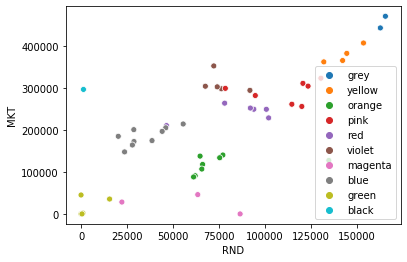

In [61]:
import seaborn as sb
sb.scatterplot(df.RND, df.MKT, hue=col)
import matplotlib.pyplot as plt
plt.show()

In [57]:
df["Labels"] = model.labels_

In [58]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT,Labels
0,165349.20,136897.80,471784.10,New York,192261.83,8
1,162597.70,151377.59,443898.53,California,191792.06,8
2,153441.51,101145.55,407934.54,Florida,191050.39,4
3,144372.41,118671.85,383199.62,New York,182901.99,4
4,142107.34,91391.77,366168.42,Florida,166187.94,4


In [59]:
df.Labels.value_counts()

2    9
7    8
5    7
0    6
6    5
1    5
4    4
9    3
8    2
3    1
Name: Labels, dtype: int64

In [62]:
df[df.Labels != 3] # remove outliers

,RND,ADMIN,MKT,STATE,PROFIT,Labels
0,165349.20,136897.80,471784.10,New York,192261.83,8
1,162597.70,151377.59,443898.53,California,191792.06,8
2,153441.51,101145.55,407934.54,Florida,191050.39,4
3,144372.41,118671.85,383199.62,New York,182901.99,4
4,142107.34,91391.77,366168.42,Florida,166187.94,4
5,131876.90,99814.71,362861.36,New York,156991.12,4
6,134615.46,147198.87,127716.82,California,156122.51,7
7,130298.13,145530.06,323876.68,Florida,155752.60,5
8,120542.52,148718.95,311613.29,New York,152211.77,5
9,123334.88,108679.17,304981.62,California,149759.96,5
